# Initialization & Loading Dataset
Setting up the path to the dataset folder in Google Drive. Using it we can access the animal dataset.This section code loads and preprocess the image dataset

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [ ]:
image_data ='/content/drive/MyDrive/Colab Notebooks/animal_dataset'


IMAGES = []
for c in os.listdir(image_data):
    IMAGES.append(c)

# Count images in each folder
counts = {}
for c in IMAGES:
    folder = os.path.join(image_data, c)
    files = [f for f in os.listdir(folder)]
    counts[c] = len(files)

print("\nTotal images in every file:")
for class_name, count in counts.items():
    print(f"   {class_name}: {count} images")

total_images = sum(counts.values())
print(f"\nTotal images: {total_images}")


Total images in every file:
   dog: 100 images
   panda: 100 images
   cat: 100 images

Total images: 300


# Show data
Loop through each category (e.g., cat, panda, dog)

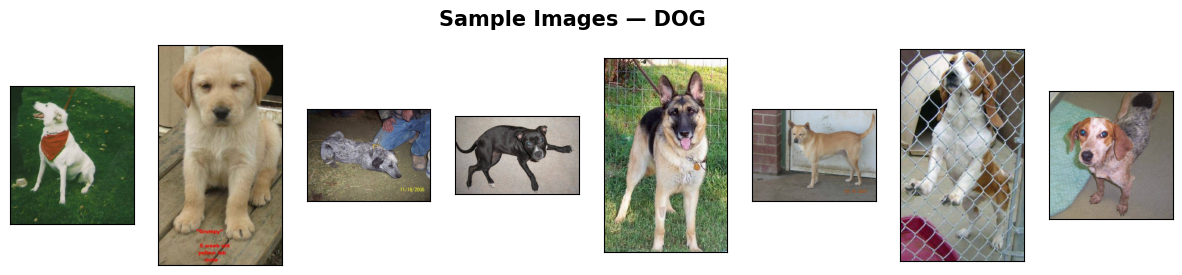

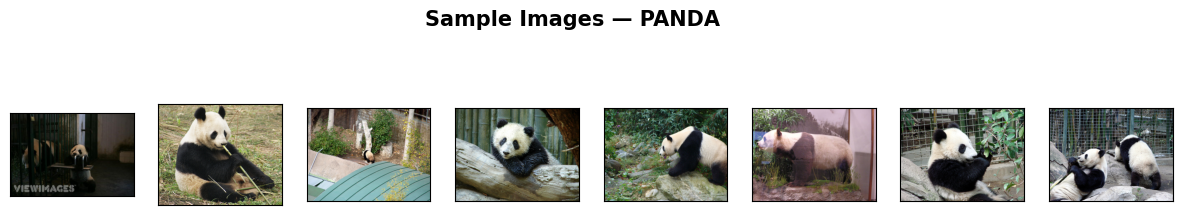

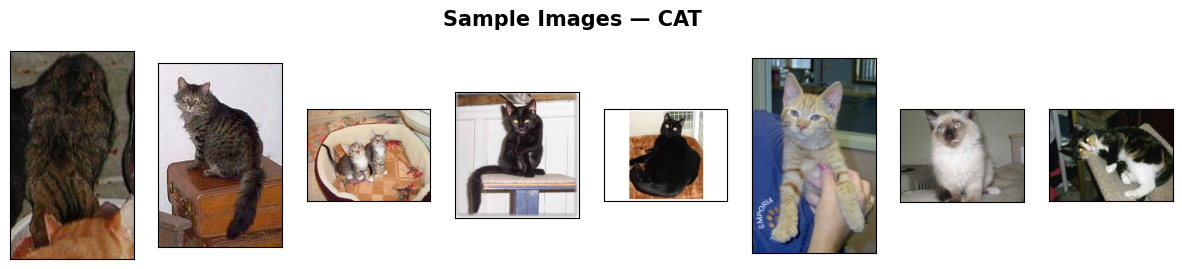

In [ ]:
for c in IMAGES:

    folder_path = os.path.join(image_data, c)

    image_names = os.listdir(folder_path)[:8]

    fig, axes = plt.subplots(1, 8, figsize=(15, 3))
    fig.suptitle(
        f"Sample Images — {c.upper()}",
        fontsize=15,
        fontweight='bold'
    )

    # Loop through subplot axes and image names together
    for ax, image_name in zip(axes, image_names):

        # Build full path to the image
        image_path = os.path.join(folder_path, image_name)
        image = plt.imread(image_path)
        ax.imshow(image)

        # Remove axis lines & numbers
        ax.set_xticks([])
        ax.set_yticks([])

    # Display the row of images
    plt.show()


Convert the image in grayscale and resized to 32x32 pixels to ensure uniform input size. Then the images are flattened from 32x32 pixels into a 1D array of 1024 elements per image.


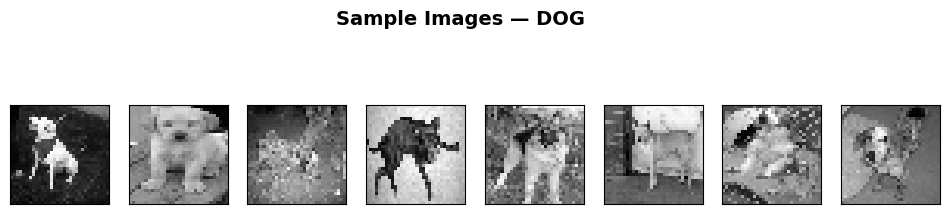

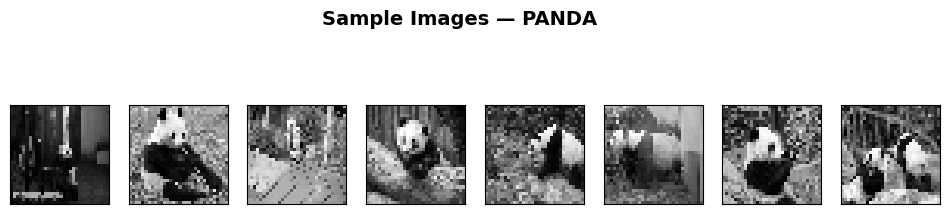

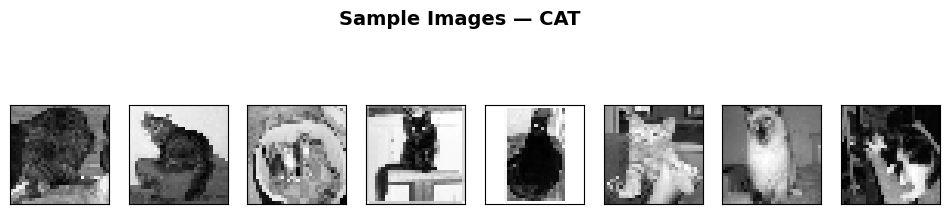

In [ ]:
IMAGES = []
labels = []

# Loop through each class/category folder
for c in os.listdir(image_data):

    class_path = os.path.join(image_data, c)
    all_files = os.listdir(class_path)

    for img_file in all_files:

        img_path = os.path.join(class_path, img_file)

        # Read in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        img = cv2.resize(img, (32, 32))

        IMAGES.append(img)
        labels.append(c)

    sample_files = all_files[:8]

    fig, axes = plt.subplots(1, 8, figsize=(12, 3))
    fig.suptitle(f"Sample Images — {c.upper()}", fontsize=14, fontweight='bold')
    for ax, img_file in zip(axes, sample_files):

        img_path = os.path.join(class_path, img_file)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32))

        ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
# Convert to numpy arrays
images = np.array(IMAGES)
labels = np.array(labels)

# Flatten images (32x32 → 1024)
X = images.reshape(len(images), -1)
y = labels

# KNN Classifier

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 3, 5, 7, 9, 11]

accuracy_l1 = []   # store avg accuracy for Manhattan (L1)
accuracy_l2 = []   # store avg accuracy for Euclidean (L2)

# 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:

    fold_scores_l1 = []   # accuracy for each fold (L1)
    fold_scores_l2 = []   # accuracy for each fold (L2)

    # Split dataset into 5 parts
    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # KNN with L1 distance -- Manhattan
        knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_l1.fit(X_train, y_train)
        fold_scores_l1.append(knn_l1.score(X_test, y_test))

        # KNN with L2 distance -- euclidean
        knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_l2.fit(X_train, y_train)
        fold_scores_l2.append(knn_l2.score(X_test, y_test))

    # Average accuracy over 5 folds
    accuracy_l1.append(float(np.mean(fold_scores_l1)))
    accuracy_l2.append(float(np.mean(fold_scores_l2)))

print("K values:", k_values)
print("Manhattan (L1) Accuracy:", accuracy_l1)
print("Euclidean (L2) Accuracy:", accuracy_l2)


K values: [1, 3, 5, 7, 9, 11]
Manhattan (L1) Accuracy: [0.4, 0.38666666666666666, 0.3633333333333333, 0.42333333333333334, 0.41000000000000003, 0.4366666666666667]
Euclidean (L2) Accuracy: [0.3566666666666667, 0.35666666666666663, 0.35333333333333333, 0.3633333333333334, 0.36000000000000004, 0.37333333333333335]


# Discussion
The graph demonstrates a perfromance of the Manhattan(L1) & Euclidean(L2). Here the Euclidean(L2) is outperformed by Manhattan(L1).

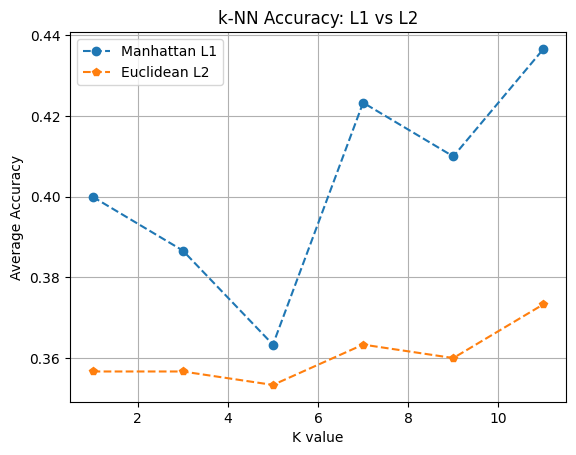

In [ ]:
plt.plot(k_values, accuracy_l1,linestyle='--', marker='o', label='Manhattan L1',)
plt.plot(k_values, accuracy_l2,linestyle='--', marker='p', label='Euclidean L2')

plt.xlabel("K value")
plt.ylabel("Average Accuracy")
plt.title("k-NN Accuracy: L1 vs L2")
plt.legend()
plt.grid(True)
plt.show()


Top-5 Predictions with KNN(Manhattan}




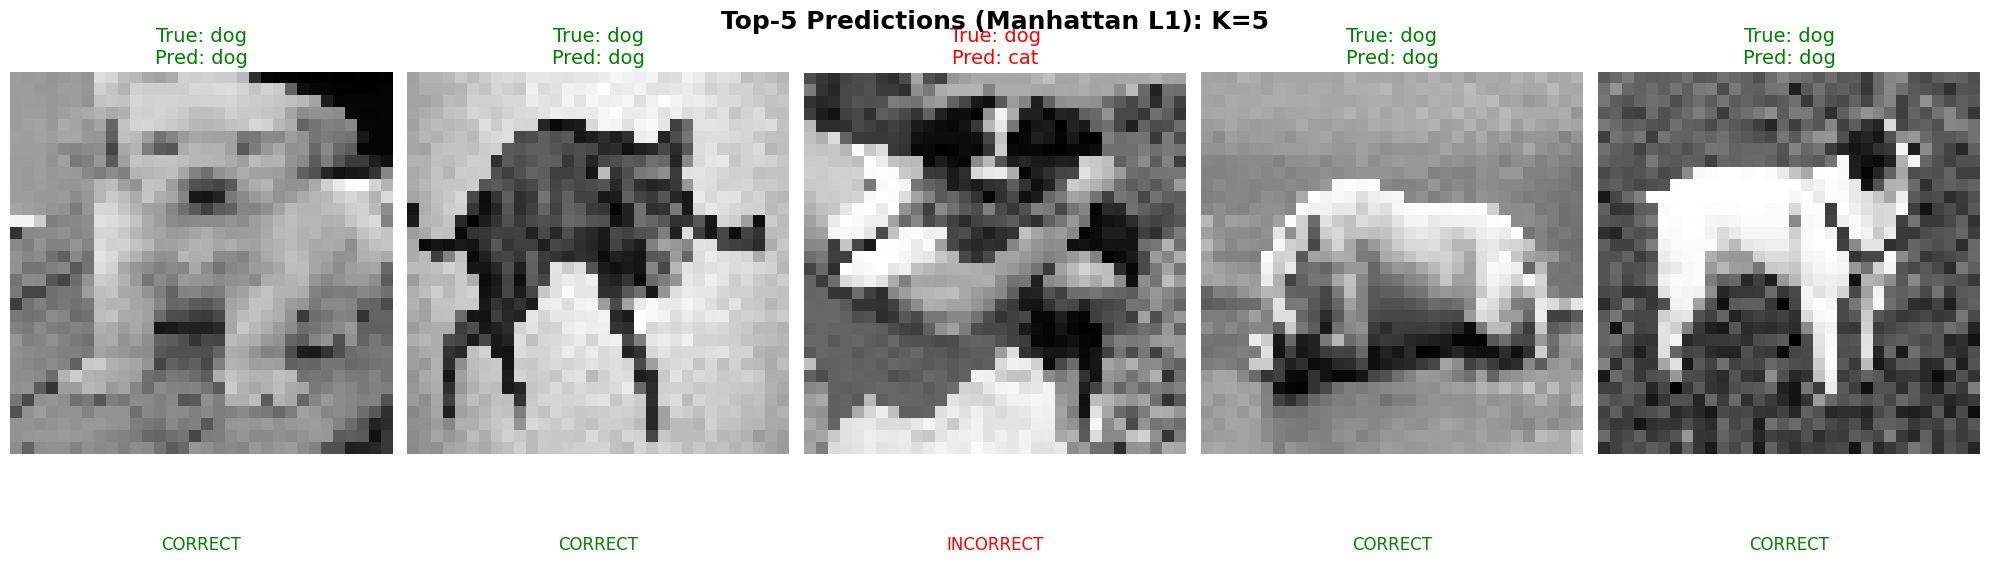

In [ ]:
final_knn_l1 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
final_knn_l1.fit(X, y)

num_images1 = 5
k1 = 5

plt.figure(figsize=(20, 5))
plt.suptitle(f"Top-5 Predictions (Manhattan L1): K={k1}", fontsize=18, fontweight="bold")

for i in range(num_images1):


    img_vector = X_test[i]
    true_label = y_test[i]


    img = img_vector.reshape(32, 32)

    # get nearest neighbors
    distances, neighbors = final_knn_l1.kneighbors([img_vector], n_neighbors=k1)
    predictions = y[neighbors[0]]
    pred_label = predictions[3] # Get the top-1 predictio

    # correctness check
    is_correct = (pred_label == true_label)
    correctness_text = "CORRECT" if is_correct else "INCORRECT"
    color = "green" if is_correct else "red"

    # Plot image
    plt.subplot(1, num_images1, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Text above image
    plt.title(
        f"True: {true_label}\nPred: {pred_label}",
        fontsize=14,
        color=color
    )

    # Text below image
    plt.text(
        0.5, -0.25,
        correctness_text,
        fontsize=12,
        color=color,
        ha='center',
        transform=plt.gca().transAxes
    )

plt.tight_layout()
plt.show()

Top-5 Predictions with KNN(Euclidean}

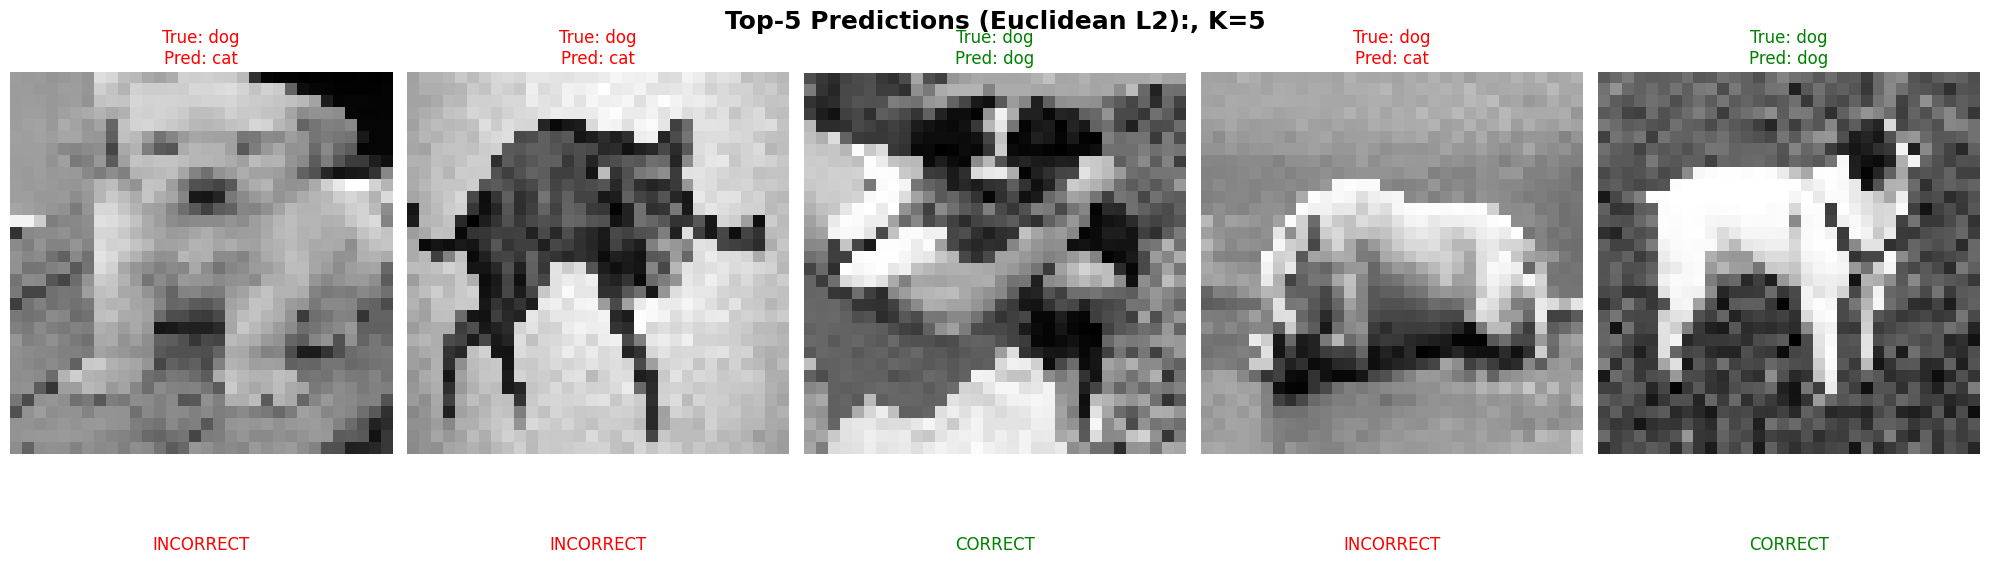

In [ ]:
final_knn_l2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
final_knn_l2.fit(X, y)
num_images = 5
k = 5

plt.figure(figsize=(20, 5))
plt.suptitle(f"Top-5 Predictions (Euclidean L2):, K={k}", fontsize=18, fontweight="bold")

for i in range(num_images):


    img_vector = X_test[i]
    true_label = y_test[i]


    img = img_vector.reshape(32, 32)

    # get nearest neighbors
    distances, neighbors = final_knn_l2.kneighbors([img_vector], n_neighbors=k)
    predictions = y[neighbors[0]]
    pred_label = predictions[3]

    # correctness check
    is_correct = (pred_label == true_label)
    correctness_text = "CORRECT" if is_correct else "INCORRECT"

    # colors
    color = "green" if is_correct else "red"

    # Plot image
    plt.subplot(1, num_images, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Text above image
    plt.title(
        f"True: {true_label}\nPred: {pred_label}",
        fontsize=12,
        color=color
    )

    # Text below image
    plt.text(
        0.5, -0.25,
        correctness_text,
        fontsize=12,
        color=color,
        ha='center',
        transform=plt.gca().transAxes
    )

plt.tight_layout()
plt.show()